# Settings


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
#!rm -rf content/__MACOSX
#%cd /content/sample_data
%cd /gdrive/My\ Drive/Colab\ Notebooks/own_projects/ai_kea
!ls


/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea
ai_kea.ipynb  ikea_files.pkl  models	     test
data	      labels.csv      models_backup  train


In [0]:
import os
from os import walk


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
# import * is used here to play, but for production purposes we shouldn't do it.

In [0]:
from pathlib import Path

mypath=os.getcwd()
p = Path(mypath)
f=p/'train'

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 
#Plot inside of the notebook

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

#

## Ikea

In [0]:
import pandas as pd

all_files = []
for i in (p/'train').rglob('*.*'):
    filename, file_extension = os.path.splitext(str(i.name))
    if file_extension in ['.jpg','.png','.jpeg']:
      try:
        open_image(i)
        file_name=i.parts[-2]+'/'+i.name
        all_files.append((file_name,i.parts[-2],i.name,file_extension, i.parent, i.stat().st_size/1000))
      except:
        print(i)

columns = ['dir','classes',"File_Name",'extension', "Parent", "Size [Kb]"]
df = pd.DataFrame(all_files, columns=columns)

df.head()

/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea/train/MUSKAN Shelving unit/61.jpg
/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea/train/MUSKAN Shelving unit/98.jpg
/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea/train/KALLAX Shelving unit/88.png
/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea/train/KALLAX Shelving unit/8.jpg
/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea/train/KALLAX Shelving unit/102.jpg
/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea/train/KALLAX Shelving unit/46.jpg
/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea/train/STABBIG Decoration/15.jpg
/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea/train/STABBIG Decoration/19.jpg
/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea/train/LACK Coffee table /61.jpg
/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea/train/LACK Coffee table /72.jpg
/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea/train/LACK Coffee table /7.jpg
/gdrive/My Drive/Colab Notebooks/own_projects/ai_kea/t

dir  ... Size [Kb]
0  MUSKAN Shelving unit/63.jpg  ...    10.643
1  MUSKAN Shelving unit/77.jpg  ...    94.761
2  MUSKAN Shelving unit/88.jpg  ...    11.944
3  MUSKAN Shelving unit/76.jpg  ...    98.008
4  MUSKAN Shelving unit/89.jpg  ...    64.575

[5 rows x 6 columns]

In [0]:
df.to_csv(p/"data/image_list_clean", index=False)

In [0]:
images= pd.read_csv(p/"data/image_list_clean")


In [0]:
images.head()

dir  ... Size [Kb]
0  MUSKAN Shelving unit/63.jpg  ...    10.643
1  MUSKAN Shelving unit/77.jpg  ...    94.761
2  MUSKAN Shelving unit/88.jpg  ...    11.944
3  MUSKAN Shelving unit/76.jpg  ...    98.008
4  MUSKAN Shelving unit/89.jpg  ...    64.575

[5 rows x 6 columns]

In [0]:
images2=images[['dir','classes']]

In [0]:
images2.columns = ['name', 'label']

In [0]:
images2.head()

name                 label
0  MUSKAN Shelving unit/63.jpg  MUSKAN Shelving unit
1  MUSKAN Shelving unit/77.jpg  MUSKAN Shelving unit
2  MUSKAN Shelving unit/88.jpg  MUSKAN Shelving unit
3  MUSKAN Shelving unit/76.jpg  MUSKAN Shelving unit
4  MUSKAN Shelving unit/89.jpg  MUSKAN Shelving unit

In [0]:
images2.to_csv(p/"labels.csv", index=False)

In [0]:
images.classes.value_counts()

FRIHETEN 1-seat sofa               186
RIBBA Frame                        156
LIVSVERK Vase                      148
VIMLE 2-seat sofa                  128
KALLAX Shelving unit                98
BESTÅ storage system               97
LACK Coffee table                   94
STOENSE Rug                         88
MARJUN curtains                     87
HENRIKSDAL Chair                    84
BRANÄS Basket                      84
ALSEDA Stool                        83
MOSJÖ TV bench                     82
RÅDIG Espresso maker               73
LAUTERS Floor lamp                  71
HABITAT gala glass table            64
INGEFÄRA Plant pot with saucer     64
MARTIN Chair                        63
SALMI Glass Table                   63
NOCKEBY 2-seat sofa                 63
DRAGAN- Soap dispenser              62
SANDARED Pouffe                     62
MUSKAN Shelving unit                62
RINGBLOMMA Roman blind              59
SAMVERKA Decoration                 55
RINNIG Soap dispenser    

In [0]:
data = ImageDataBunch.from_df(path=f, df=images,ds_tfms=get_transforms(), size=224 )





In [0]:
my_tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=15, max_zoom=2, max_lighting=0.2,
                     max_warp=None, p_affine=1, p_lighting=.45)


data_2 = ImageDataBunch.from_csv(path=p/'train', 
                               csv_labels=p/'labels.csv', 
                               test='test',
                               size=224,
                              ds_tfms=my_tfms,
                                bs=128)

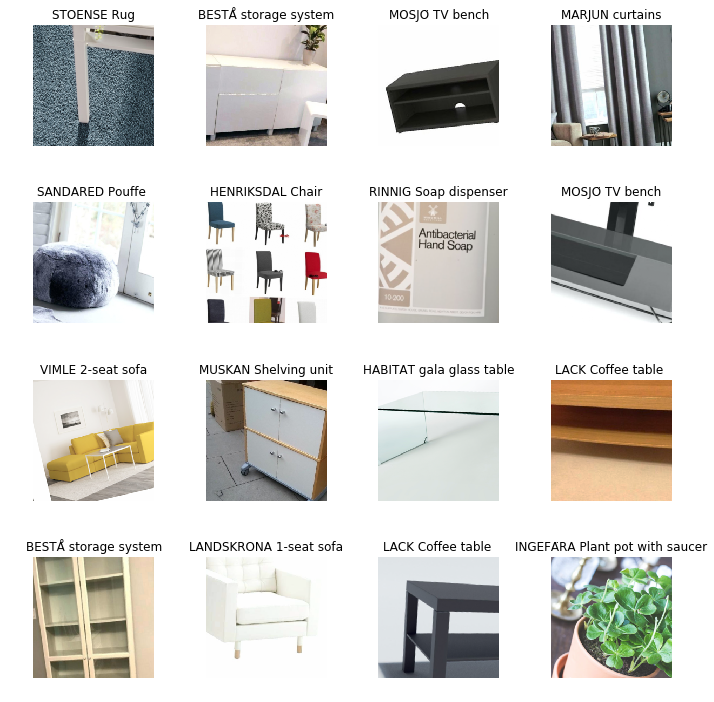

In [0]:
data_2.show_batch(rows=4, figsize=(10,10))

In [0]:
my_tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=45, max_zoom=1.15, max_lighting=0.2,
                     max_warp=None, p_affine=1, p_lighting=.45)

tr_do_flip=get_transforms(do_flip=True, flip_vert=True, max_rotate=None, max_zoom=1, max_lighting=None,
                     max_warp=None, p_affine=None, p_lighting=None)

tfms =zoom_crop(scale=(0.75,2),do_rand=False)
tfms_2 =zoom_crop(scale=(0.75,2),do_rand=True)


#_tfms = get_transforms(do_flip=True)
#tfms = [_tfms[0]+[flip_lr()], _tfms[1]+[flip_lr()] ]



In [0]:
(tr_do_flip[0])

[RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmAffine (dihedral_affine), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)]

In [0]:
(tfms)

[RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (0.75, 2)}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)]

In [0]:
tfms_2

[RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (0.75, 2), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)]

In [0]:
my_tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (dihedral_affine), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-45, 45)}, p=1, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.15), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.45, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.45, resolved={}, do_run=True, is_random=True, use_on_y=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True, use_

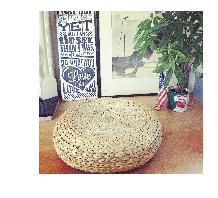

In [0]:
def get_ex(): return open_image(p/'train/ALSEDA Stool/9.jpg')
image=get_ex()
image.show()
# original Image

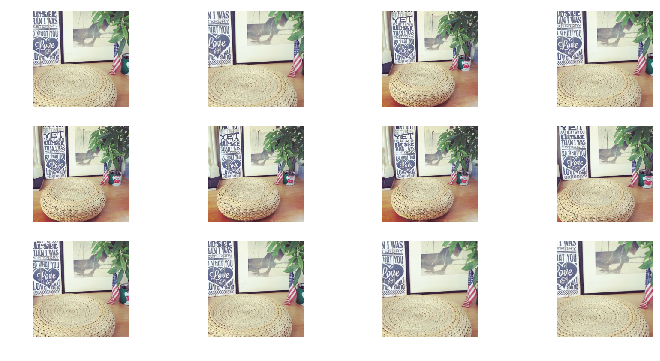

In [0]:
def show_transforms(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

show_transforms(3, 4, 12, 6, size=224)


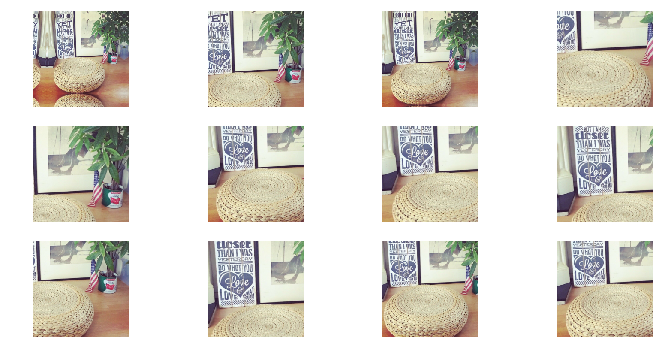

In [0]:
def show_transforms(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms_2[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

show_transforms(3, 4, 12, 6, size=224)

In [0]:
print(data.classes)
len(data.classes),data.c

['ALSEDA Stool', 'BESTÅ storage system', 'BRANÄS Basket', 'DRAGAN- Soap dispenser', 'FRIHETEN 1-seat sofa', 'HABITAT gala glass table', 'HENRIKSDAL Chair', 'INGEFÄRA Plant pot with saucer', 'KAFFEBÖNA Plant pot ', 'KALLAX Shelving unit', 'LACK Coffee table ', 'LANDSKRONA 1-seat sofa', 'LAUTERS Floor lamp', 'LIVSVERK Vase', 'MARJUN curtains', 'MARTIN Chair', 'MOSJÖ TV bench', 'MUSKAN Shelving unit', 'NOCKEBY 2-seat sofa', 'RÅDIG Espresso maker', 'RIBBA Frame', 'RINGBLOMMA Roman blind', 'RINGBLOMMA Roman blind (1)', 'RINNIG Soap dispenser', 'SALMI Glass Table', 'SAMVERKA Decoration', 'SANDARED Pouffe ', 'STABBIG Decoration', 'STOENSE Rug', 'TRULSTORP Coffee table', 'VIMLE 2-seat sofa']


(31, 31)

In [0]:
print(data_2.classes)
len(data_2.classes),data_2.c

['ALSEDA Stool', 'BESTÅ storage system', 'BRANÄS Basket', 'DRAGAN- Soap dispenser', 'FRIHETEN 1-seat sofa', 'HABITAT gala glass table', 'HENRIKSDAL Chair', 'INGEFÄRA Plant pot with saucer', 'KAFFEBÖNA Plant pot ', 'KALLAX Shelving unit', 'LACK Coffee table ', 'LANDSKRONA 1-seat sofa', 'LAUTERS Floor lamp', 'LIVSVERK Vase', 'MARJUN curtains', 'MARTIN Chair', 'MOSJÖ TV bench', 'MUSKAN Shelving unit', 'NOCKEBY 2-seat sofa', 'RÅDIG Espresso maker', 'RIBBA Frame', 'RINGBLOMMA Roman blind', 'RINNIG Soap dispenser', 'SALMI Glass Table', 'SAMVERKA Decoration', 'SANDARED Pouffe ', 'STABBIG Decoration', 'STOENSE Rug', 'VIMLE 2-seat sofa']


(29, 29)

In [0]:
with open(p/'data/ikea_images.pkl', "wb") as f:
    pickle.dump(data, f)

In [0]:
with open(p/'data/ikea_images.pkl', "rb") as f:
     data=pickle.load(f)

In [0]:
with open(p/'data/ikea_images_2_clean.pkl', "wb") as f:
    pickle.dump(data_2, f)

In [0]:
with open(p/'data/ikea_images_2_clean.pkl', "rb") as f:
     data_2=pickle.load(f)

## Training: resnet34

In [0]:
learn = cnn_learner(data_2, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 103540380.74it/s]


###learn.model


In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

In [0]:
learn.load(p/'models/data_2_round1-resnet18');


In [0]:
learn.fit_one_cycle(2,1e-2)
# 4 is the number of times we show the dataset to the model.

In [0]:
learn.save(p/'models/data_2_round1-resnet18')
# This is for saving the weights of the model.

## Results

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
# learn knows what is my data and what is my model
# interp is a classification interpretation object

losses,idxs = interp.top_losses()

#len(data.valid_ds)==len(losses)==len(idxs)

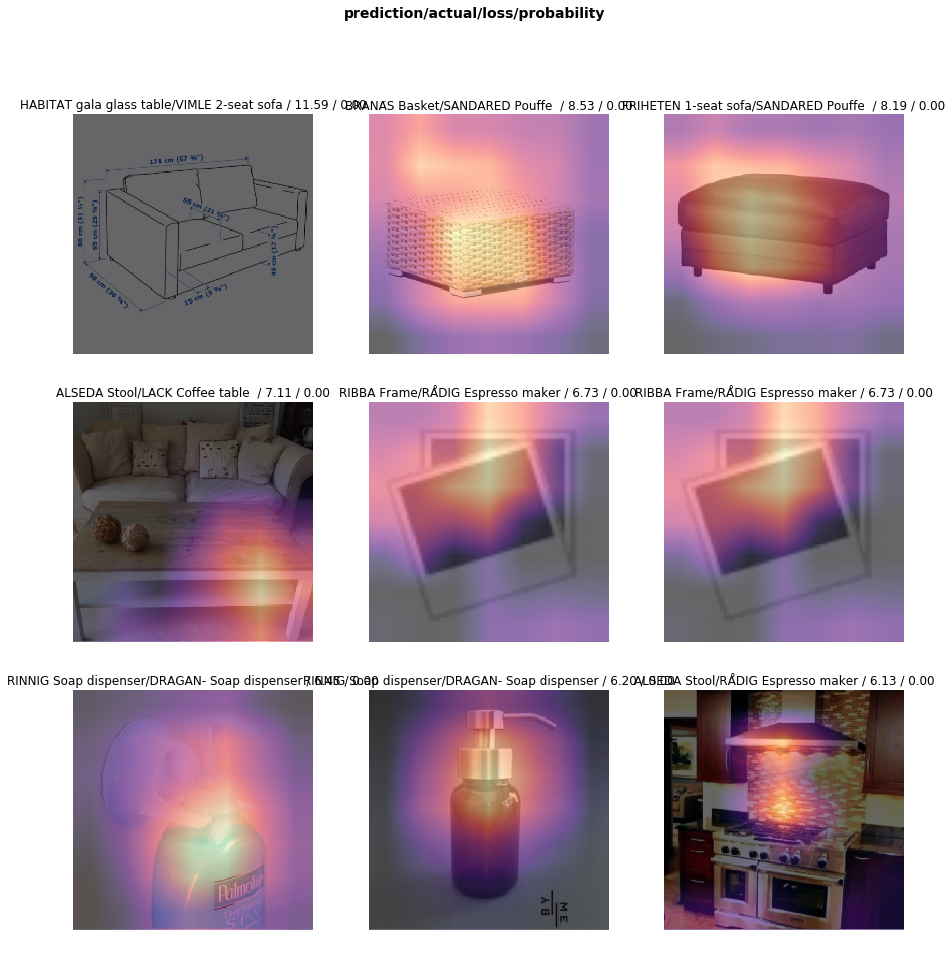

In [0]:
interp.plot_top_losses(9, figsize=(15,15))
# loss function tells us how good is my prediction
# a high loss means a big difference between prediction and reality
# we are printing the worst predictions.
# The tittle shows ( predictin / actual / loss / prob of actual class)

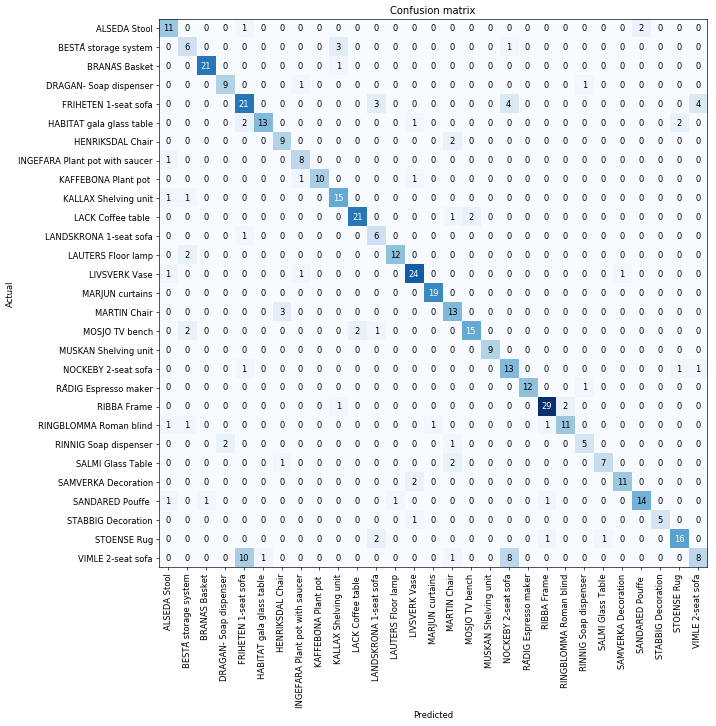

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
# List of many predictions Vs actuals.
# It is showing that 40 Abyssinian were preditect correctly, but 4 were not.

In [0]:
interp.most_confused(min_val=2)
# Grabs from the confusion matrix, the tuple that gots more confused and the number of times
#that got confusing.

[('FRIHETEN 1-seat sofa', 'VIMLE 2-seat sofa', 11),
 ('BESTÅ storage system', 'KALLAX Shelving unit', 7),
 ('RINGBLOMMA Roman blind', 'RINGBLOMMA Roman blind (1)', 7),
 ('RINGBLOMMA Roman blind (1)', 'RINGBLOMMA Roman blind', 7),
 ('STABBIG Decoration', 'LIVSVERK Vase', 7),
 ('FRIHETEN 1-seat sofa', 'LANDSKRONA 1-seat sofa', 6),
 ('TRULSTORP Coffee table', 'LACK Coffee table ', 6),
 ('VIMLE 2-seat sofa', 'NOCKEBY 2-seat sofa', 6),
 ('MARJUN curtains', 'RINGBLOMMA Roman blind', 5),
 ('LANDSKRONA 1-seat sofa', 'VIMLE 2-seat sofa', 4),
 ('MARTIN Chair', 'HENRIKSDAL Chair', 4),
 ('RIBBA Frame', 'RINGBLOMMA Roman blind', 4),
 ('DRAGAN- Soap dispenser', 'RINNIG Soap dispenser', 3),
 ('INGEFÄRA Plant pot with saucer', 'KAFFEBÖNA Plant pot ', 3),
 ('KALLAX Shelving unit', 'BESTÅ storage system', 3),
 ('NOCKEBY 2-seat sofa', 'VIMLE 2-seat sofa', 3),
 ('SALMI Glass Table', 'TRULSTORP Coffee table', 3),
 ('STABBIG Decoration', 'SAMVERKA Decoration', 3),
 ('TRULSTORP Coffee table', 'LAUTERS Fl

## Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()
# This is to release ( or unfreeze) the whole model so the model can be 
# entirely trained
'''
 The different layers represent differnt levels of semantic complexity. 
 The deeper you go in the layer, the more complex things you can identify.
 in example, in the layer 2 I may be able to differenciate cats from planes, 
 but in the layer 8 I may be able to differciate differnet breeds of cats / types of planes
 
'''


'\n The different layers represent differnt levels of semantic complexity. \n The deeper you go in the layer, the more complex things you can identify.\n in example, in the layer 2 I may be able to differenciate cats from planes, \n but in the layer 8 I may be able to differciate differnet breeds of cats / types of planes\n \n'

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.79E-04
Min loss divided by 10: 1.45E-04


' plots the learning rate. how quickly I can update the parameter of my model'

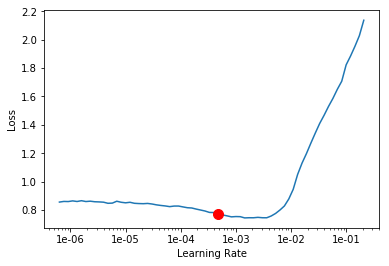

In [0]:
learn.recorder.plot(suggestion=True)
''' plots the learning rate. how quickly I can update the parameter of my model'''

In [0]:
#learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-4))
learn.fit_one_cycle(6, max_lr=slice(1e-6, 1e-3))

In [0]:
learn.save(p/'models/data_2_round2-resnet18-unfre-e10')


In [0]:
learn.load(p/'models/data_2_round2-resnet18-unfre-e10');


In [0]:
interp = ClassificationInterpretation.from_learner(learn)
# learn knows what is my data and what is my model
# interp is a classification interpretation object

losses,idxs = interp.top_losses()

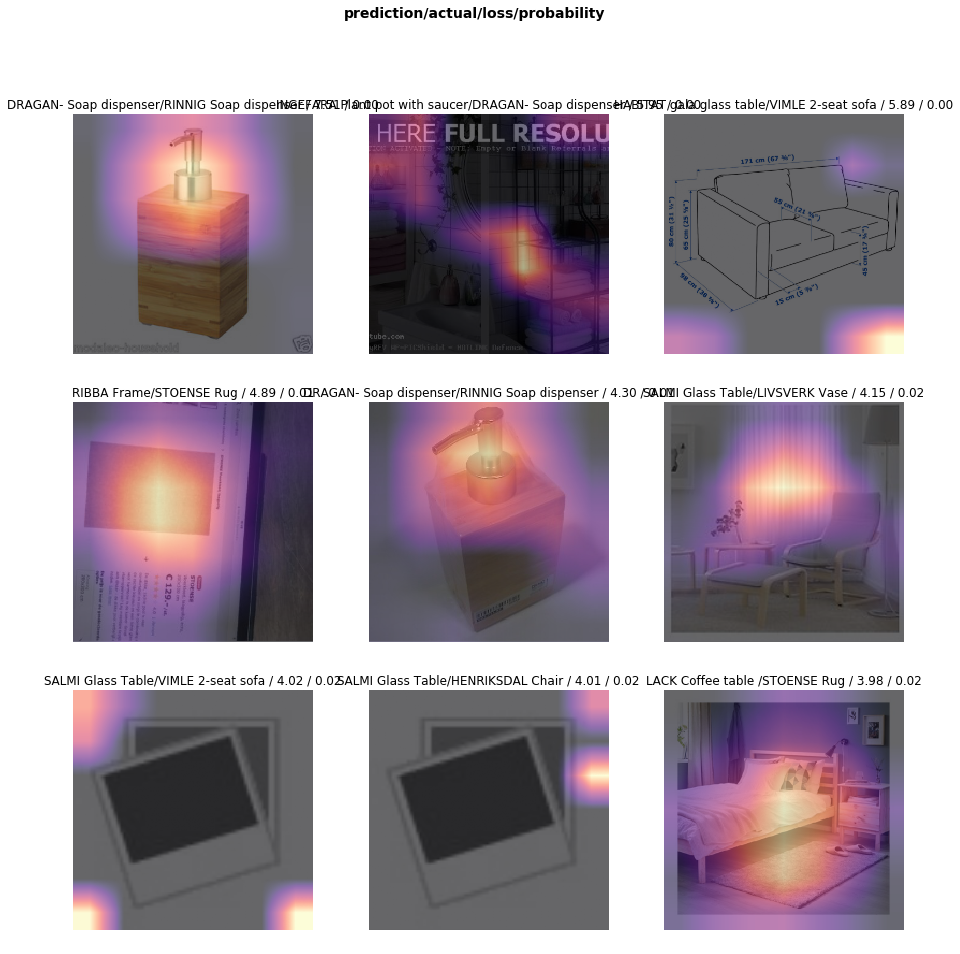

In [0]:
interp.plot_top_losses(9, figsize=(15,15))


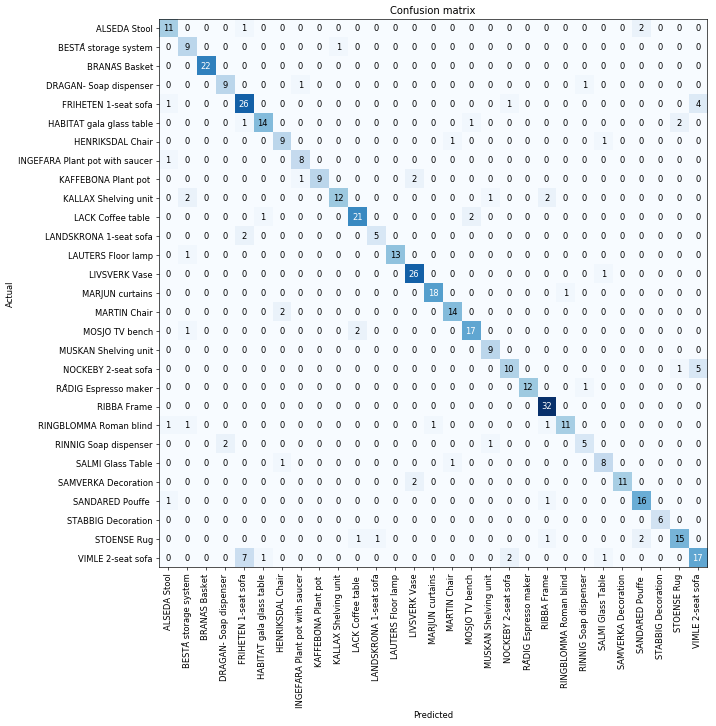

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


### Export

In [0]:
learn.export(p/'models/export_model.pkl')


## Predictions



In [0]:
learn.show_results()

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [0]:
file_name=[]
for i in (p/'test').rglob('*.*'):
    filename, file_extension = os.path.splitext(str(i.name))
    file_name.append(filename)
len(file_name)

25

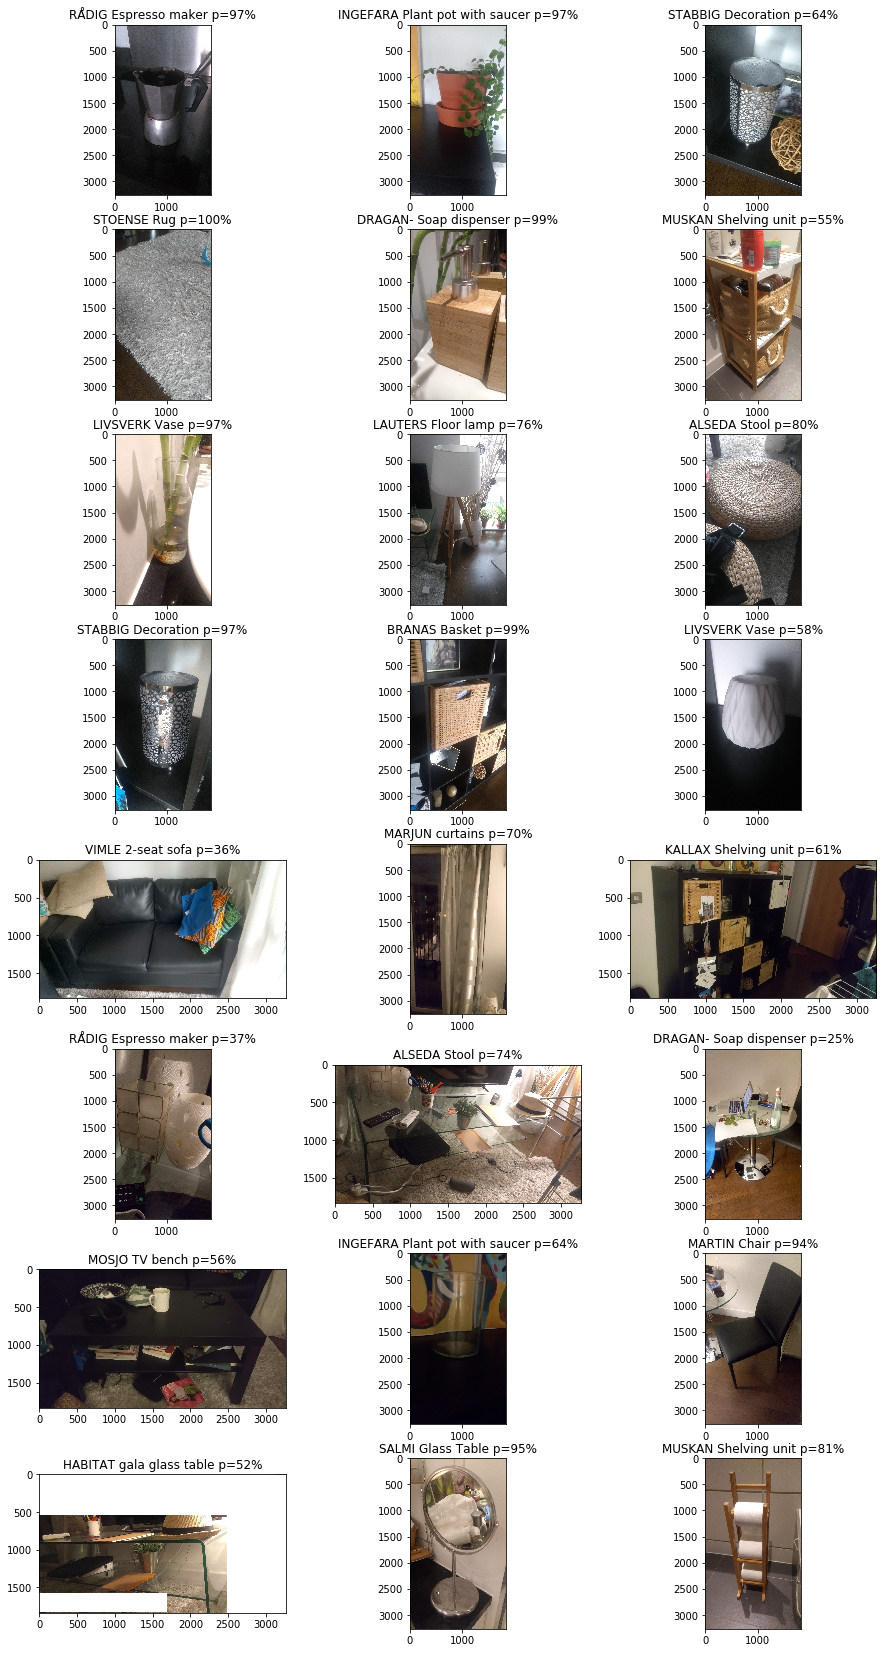

In [0]:
w=15
h=15
fig=plt.figure(figsize=(15, 15))
columns = 3
rows = (len(file_name)//columns)+1
fig.subplots_adjust(top=1.8)
for i in range(1, len(file_name)):
    img2 = open_image(p/('test/'+file_name[i]+'.jpg'))
    pred_class, pred_idx, outputs = learn.predict(img2)
    #testprobs = np.exp(outputs)
    #pr=torch.softmax(testprobs,dim=0)
    #idx=pred_idx.item()
    prob=outputs[pred_idx]*100#prob=pr[idx]*100
    prob.item()
    img=mpimg.imread(p/('test/'+file_name[i]+'.jpg'))
    

    
    ax=fig.add_subplot(rows, columns, i)
    ax.set_title("{} p={:2.0f}%".format(pred_class,
                                prob),
              )
      #ax.set_title(str(pred_class)+'-'+ str(prob))
    imgplot = plt.imshow(img)
plt.show()

In [0]:
pred_class, pred_idx, outputs = learn.predict(img2)


In [0]:
img2 = open_image(p/('test/'+'IMG_20190711_173542832'+'.jpg'))
#imgplot = plt.imshow(img2)

In [0]:
pred_class, pred_idx, outputs = learn.predict(img2)

In [0]:
outputs[19]

tensor(0.9677)

In [0]:
pred_class,pred_idx,outputs,

(Category RÅDIG Espresso maker,
 tensor(19),
 tensor([1.5253e-05, 1.4473e-04, 6.4022e-05, 3.3542e-04, 2.5090e-05, 9.1074e-06,
         1.8920e-05, 1.7945e-03, 1.1509e-03, 8.7518e-05, 1.5066e-05, 2.1800e-04,
         1.3495e-04, 8.0615e-04, 8.2013e-05, 1.4868e-04, 1.8211e-04, 3.8827e-05,
         1.4424e-05, 9.6774e-01, 6.6614e-06, 8.3921e-06, 4.3938e-03, 1.9990e-04,
         2.4128e-03, 1.3750e-04, 1.9763e-02, 2.6082e-06, 4.6815e-05]))

In [0]:
sum(outputs)

tensor(1.)

In [0]:
{'result': "{} (prob={:2.0f}%)".format(pred_class,
                                prob) }

{'result': 'MUSKAN Shelving unit (prob=81.0%)'}

In [0]:
if prob.item() >= 50: print('Confianza')

Confianza
